In [1]:
from eyring_model import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

In [3]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_jumps = 50

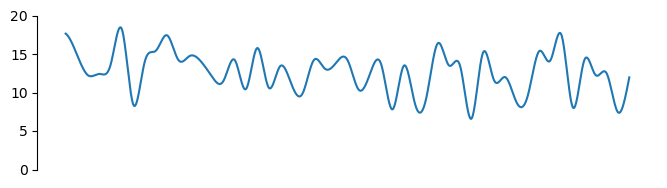

In [82]:
barrier_dist = 'norm'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier]),
                  'cov': np.array([[dH_sigma**2, 0],
                                   [0, dS_sigma**2]])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

path_spline = CubicSpline(jumps, dG, bc_type='natural')
xs = np.linspace(0, jumps.max(), num=2000)
ys = path_spline(xs)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:blue')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,20);

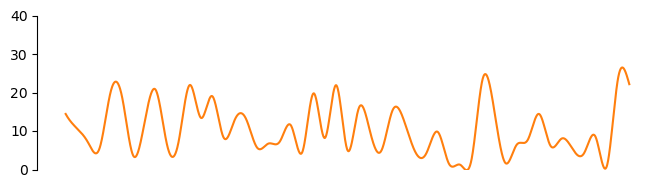

In [71]:
barrier_dist = 'exponential'
barrier_params = {'beta' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

path_spline = CubicSpline(jumps, dG, bc_type='natural')
xs = np.linspace(0, jumps.max(), num=2000)
ys = path_spline(xs)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:orange')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,40);

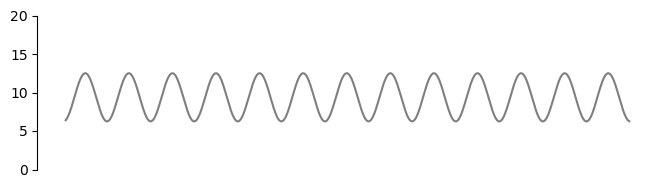

In [79]:
barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

xs = np.linspace(-np.pi/2, jumps.max(), num=2000)
ys = dG.mean()/4 * np.sin(xs/1.25) + dG.mean()*3/4

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:gray')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,20);

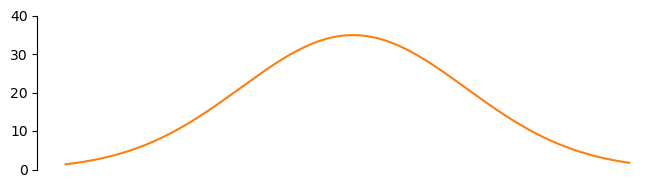

In [15]:
import scipy.stats as stats

barrier_dist = 'exponential'
barrier_params = {'beta' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

xs = np.linspace(0, jumps.max(), num=2000)
ys = 1750*stats.norm.pdf(xs, jumps.mean(), 20)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:orange')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,40);